# 棒棒糖图特征分析

同济子豪兄 2022-7-4

参考文档：https://networkx.org/documentation/stable/auto_examples/basic/plot_properties.html#sphx-glr-auto-examples-basic-plot-properties-py

## 导入工具包

In [1]:
# 图数据挖掘
import networkx as nx

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 导入图

In [2]:
# 第一个参数指定头部节点数，第二个参数指定尾部节点数
G = nx.lollipop_graph(4, 7)

## 可视化

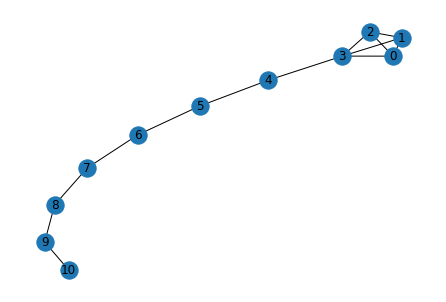

In [3]:
pos = nx.spring_layout(G, seed=3068)
nx.draw(G, pos=pos, with_labels=True)
plt.show()

## 图数据分析

In [4]:
# 半径
nx.radius(G)

4

In [5]:
# 直径
nx.diameter(G)

8

In [6]:
# 偏心度：每个节点到图中其它节点的最远距离
nx.eccentricity(G)

{0: 8, 1: 8, 2: 8, 3: 7, 4: 6, 5: 5, 6: 4, 7: 5, 8: 6, 9: 7, 10: 8}

In [7]:
# 中心节点，偏心度与半径相等的节点
nx.center(G)

[6]

In [8]:
# 外围节点，偏心度与直径相等的节点
nx.periphery(G)

[0, 1, 2, 10]

In [68]:
nx.density?

In [9]:
nx.density(G)

0.23636363636363636

n为节点个数，m为连接个数

对于无向图：

$$
density = \frac{2m}{n(n-1)}
$$

对于有向图：

$$
density = \frac{m}{n(n-1)}
$$

无连接图的density为0，全连接图的density为1，Multigraph（多重连接图）和带self loop图的density可能大于1。

## 3号节点到图中其它节点的最短距离

In [10]:
node_id = 3
nx.single_source_shortest_path_length(G, node_id)

{3: 0, 0: 1, 1: 1, 2: 1, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7}

## 每两个节点之间的最短距离

In [14]:
pathlengths = []
for v in G.nodes():
    spl = nx.single_source_shortest_path_length(G, v)
    for p in spl:
        print('{} --> {} 最短距离 {}'.format(v, p, spl[p]))
        pathlengths.append(spl[p])

0 --> 0 最短距离 0
0 --> 1 最短距离 1
0 --> 2 最短距离 1
0 --> 3 最短距离 1
0 --> 4 最短距离 2
0 --> 5 最短距离 3
0 --> 6 最短距离 4
0 --> 7 最短距离 5
0 --> 8 最短距离 6
0 --> 9 最短距离 7
0 --> 10 最短距离 8
1 --> 1 最短距离 0
1 --> 0 最短距离 1
1 --> 2 最短距离 1
1 --> 3 最短距离 1
1 --> 4 最短距离 2
1 --> 5 最短距离 3
1 --> 6 最短距离 4
1 --> 7 最短距离 5
1 --> 8 最短距离 6
1 --> 9 最短距离 7
1 --> 10 最短距离 8
2 --> 2 最短距离 0
2 --> 0 最短距离 1
2 --> 1 最短距离 1
2 --> 3 最短距离 1
2 --> 4 最短距离 2
2 --> 5 最短距离 3
2 --> 6 最短距离 4
2 --> 7 最短距离 5
2 --> 8 最短距离 6
2 --> 9 最短距离 7
2 --> 10 最短距离 8
3 --> 3 最短距离 0
3 --> 0 最短距离 1
3 --> 1 最短距离 1
3 --> 2 最短距离 1
3 --> 4 最短距离 1
3 --> 5 最短距离 2
3 --> 6 最短距离 3
3 --> 7 最短距离 4
3 --> 8 最短距离 5
3 --> 9 最短距离 6
3 --> 10 最短距离 7
4 --> 4 最短距离 0
4 --> 3 最短距离 1
4 --> 5 最短距离 1
4 --> 0 最短距离 2
4 --> 1 最短距离 2
4 --> 2 最短距离 2
4 --> 6 最短距离 2
4 --> 7 最短距离 3
4 --> 8 最短距离 4
4 --> 9 最短距离 5
4 --> 10 最短距离 6
5 --> 5 最短距离 0
5 --> 4 最短距离 1
5 --> 6 最短距离 1
5 --> 3 最短距离 2
5 --> 7 最短距离 2
5 --> 0 最短距离 3
5 --> 1 最短距离 3
5 --> 2 最短距离 3
5 --> 8 最短距离 3
5 --> 9 最短距离 4
5 --> 10 最短距离 5
6 --

In [15]:
# 平均最短距离
sum(pathlengths) / len(pathlengths)

3.2231404958677685

## 不同距离的节点对个数

In [16]:
dist = {}
for p in pathlengths:
    if p in dist:
        dist[p] += 1
    else:
        dist[p] = 1

In [17]:
dist

{0: 11, 1: 26, 2: 18, 3: 16, 4: 14, 5: 12, 6: 10, 7: 8, 8: 6}